In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv("churn_modelling.csv")

In [3]:
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**In the given dataframe, there are few columns that are irrelevant to our aim i.e. predicting customer churn. For example Customer ID is a Unique identification number generated to keep track of activities of each customer in the bank. It is not 'statistically significant' to our goal. Same is the case with RowNumber and Surname.**

**Therefore, it is safe to drop these columns.**

In [7]:
df1.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


**One important observation here is that all features, except Geography and Gender, are of numeric data types (int or float).**

In [15]:
df1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**'HasCrCard', 'IsActiveMember' and 'Exited' are categorical features, hence 25% - 50% - 75% distribution is not very useful. We will have to explore these features separately**

**Some insights from continous features are:
    1. 75% customers have CreditScore less than 718 while maximum CreditScore a customer has is 850.
    2. Mean age of customers in this bank is 38 and a majority of them (75%) are below the age of 44. A young customer base.**

Plotting Histograms might give us better insights into the data.

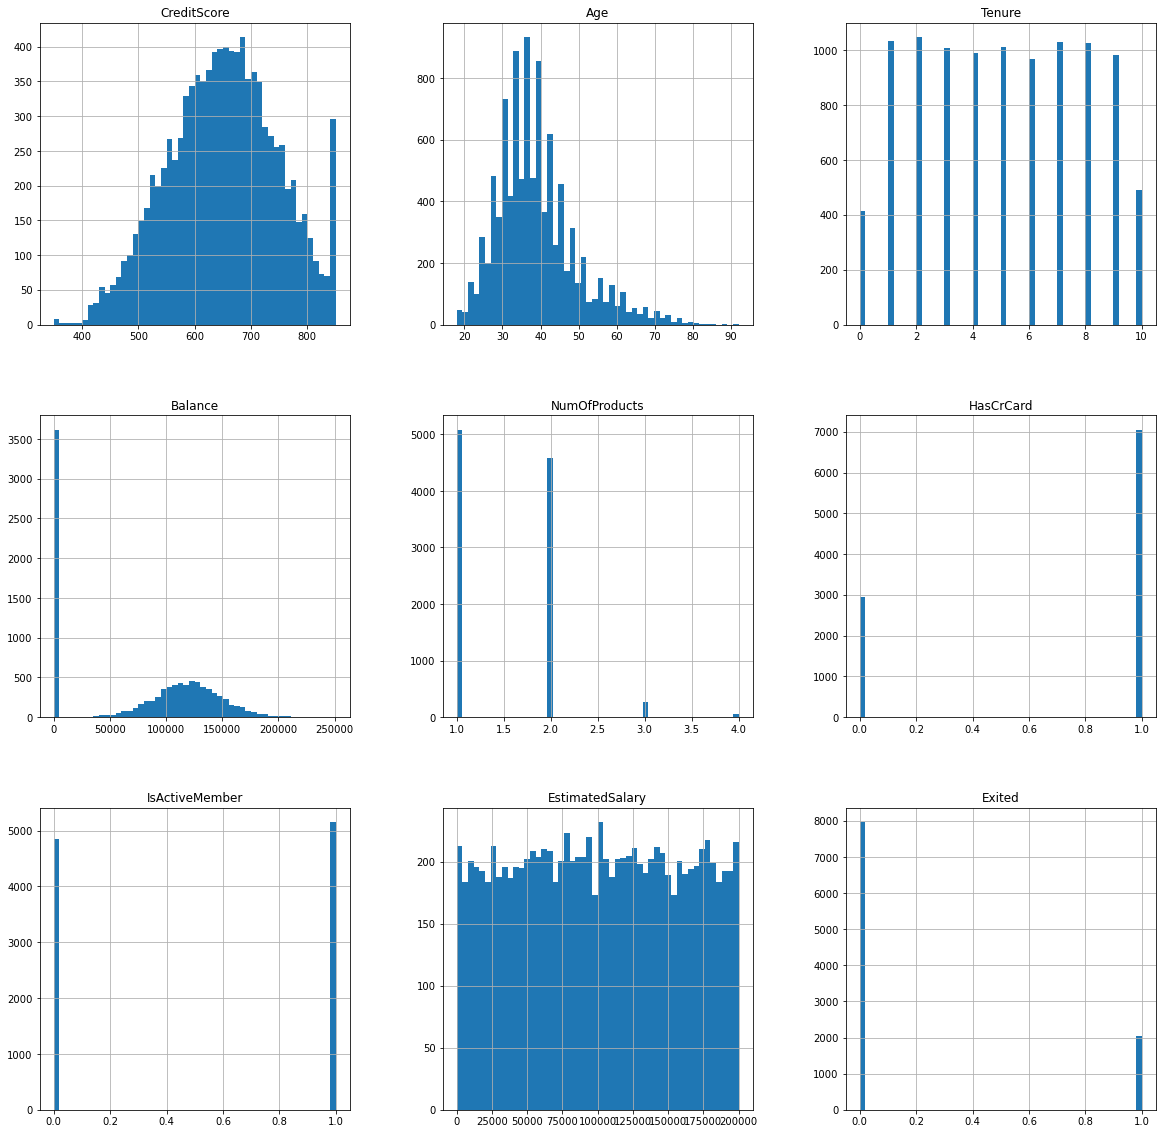

In [17]:
df1.hist(bins = 50, figsize = (20,20))
plt.show()

**This is Interesting. Credit Score and Balance seem to be normally distributed except that in case of Balance values are capped at 0. There could be a number of reasons for this. Customers who leave the bank will have 0 balance. In such cases having 0 values for exited customers is not really an issue. But there are instances where even after the customer has left, the balance is non zero. This maybe the case if the customer has exited from a product and not from the bank. We need more insights on our data before jumping onto any conclusions.**

**We can also see capped values in Credit Score (capped at 850).**

**Before rushing to take any action, let us further explore and analyse these features.**

In [22]:
df1.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

**Let us explore our target feature. What is the ratio of churners to non churners anyway?**

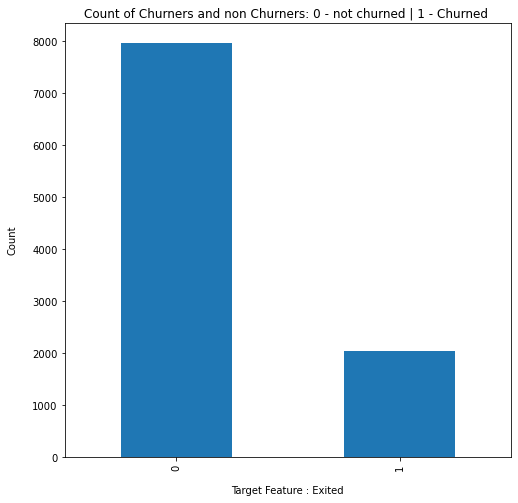

In [40]:
dfTarget = df1['Exited'].value_counts()
dfTarget.plot(kind = 'bar', figsize = (8,8))
plt.xlabel('Target Feature : Exited', labelpad= 15)
plt.ylabel('Count', labelpad= 15)
plt.title("Count of Churners and non Churners: 0 - not churned | 1 - Churned ")

plt.show()

In [28]:
(df1['Exited'].value_counts()/len(df1['Exited']))*100

0    79.63
1    20.37
Name: Exited, dtype: float64

**79.63% of customers were retained while 20.37% exited the bank**

**We need to perform Univariate, Bivariate or multivariate analysis on this data to understand the most important factors that led to churn of customers. This will help us in two two ways: The teams further down the pipeline will be able to take business decisions based on these insights and run campaigns to reduce churn. We shall be able to build better performing Machine Learning models to predict customer churn.**

## Data Exploration

Analysing distribution of Exited v/s retained by plotting each features against count of churners.

**Univariate Analysis**

In [33]:
def analyseFeatures(x):
    sns.countplot(x = x, hue = 'Exited', data = df1)

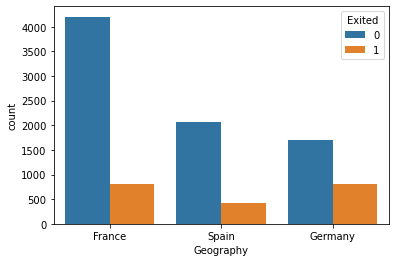

In [34]:
analyseFeatures('Geography')

**France has the highest number of customers while Germany has the least. The ratio of exited to retained seems to be larger in case of Germany than in France and Spain. In other words, churn is greater at location where customers are less. This maybe due to a number of reasons like poor customer service, low staff count etc. This vital insight could be used by other teams to further investigate and identify the reason for churn.**

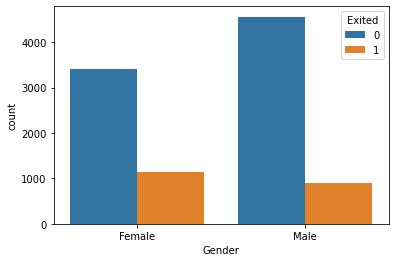

In [37]:
analyseFeatures('Gender')

**There are more Male costumers than Female customers. Also, The ratio of churning curtomers looks to be higher in Female customers than in Male customers.**

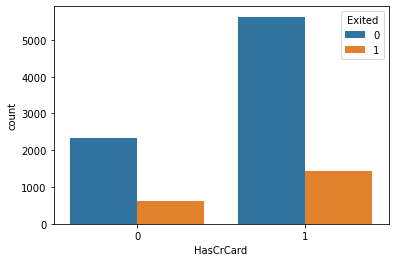

In [38]:
analyseFeatures('HasCrCard')

**A majority of customers are credit card holders. Also, according to the plot, those with a credit card are more likely to churn. Since a majority of them have a credit card, we can not be absolutely sure of this insight. We need ore information to reach a conclusion.**

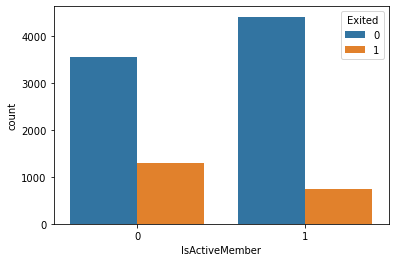

In [39]:
analyseFeatures('IsActiveMember')

**As expected, non active customers are more likely to churn.**

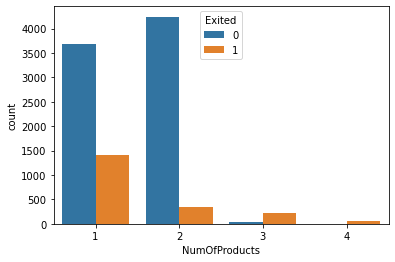

In [51]:
analyseFeatures('NumOfProducts')

**Majority of customers have either one or two products. Customers with more products are more likely to churn. This information seems critical for the bank. A customer who chooses to buy more products from a bank should be a loyal customer and should stay with the bank. On the contary, customers with more products churn. This could be because bank is not able to manage products for the customer. Further investigation into this could be useful.**

**Let us now analyse continous numerical features**

In [41]:
correlations = df1.corr()

In [45]:
correlations['Exited'].sort_values(ascending = False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

**At first glance, Age and Balance seem to have a strong positive correlation with churn. Against our expectation, Credit Score or Tenure do not seem to have an effect on customer churn. Again, we can not draw any conclusions at this point. We need more information.**

(array([ 40., 141., 281., 531., 481., 357., 163.,  32.,  10.,   1.]),
 array([18. , 24.6, 31.2, 37.8, 44.4, 51. , 57.6, 64.2, 70.8, 77.4, 84. ]),
 <BarContainer object of 10 artists>)

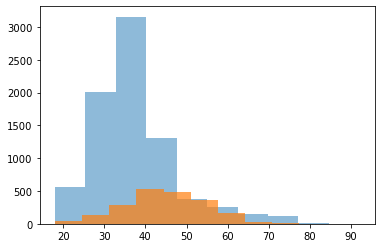

In [95]:
d1 = df1['Age'][df1['Exited'] == 0]
d2 = df1['Age'][df1['Exited'] == 1]
plt.hist(d1, alpha = 0.5)
plt.hist(d2, alpha = 0.7)

**Histograms are usually sufficient to plot distribution of data. In this case, histograms does not seem to give a very good picture of distribution. We will try Probability Density Function to get a smooth ditribution curve. For this, we use KDE(Kernel Density Estimation) plots. PDF and KDE are not exactly same. They have been explained in detail in the blog.**

In [60]:
def continousDataPlots(feature):
    Mth = sns.kdeplot(df1[feature][(df1["Exited"] == 0) ], color="Red", shade = True)
    Mth = sns.kdeplot(df1[feature][(df1["Exited"] == 1) ], ax =Mth, color="Blue", shade= True)
    Mth.legend(["No Churn","Churn"],loc='upper right')
    Mth.set_ylabel('Density')
    Mth.set_xlabel(feature)

In [102]:
def continousDataPlots(feature, df):
    Mth = sns.kdeplot(df[feature][(df["Exited"] == 0) ], color="Red", shade = True)
    Mth = sns.kdeplot(df[feature][(df["Exited"] == 1) ], ax =Mth, color="Blue", shade= True)
    Mth.legend(["No Churn","Churn"],loc='upper right')
    Mth.set_ylabel('Density')
    Mth.set_xlabel(feature)

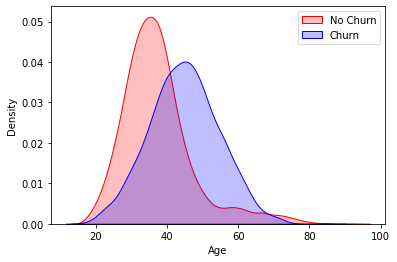

In [148]:
continousDataPlots('Age', df1)

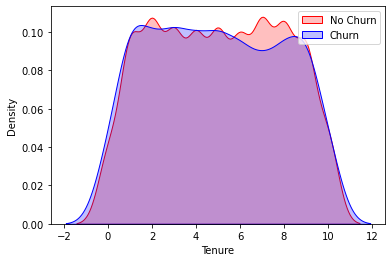

In [149]:
continousDataPlots('Tenure', df1)

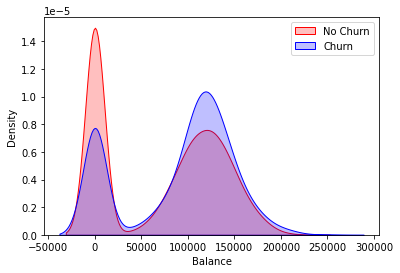

In [150]:
continousDataPlots('Balance', df1)

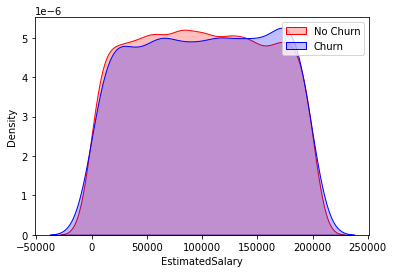

In [151]:
continousDataPlots('EstimatedSalary', df1)

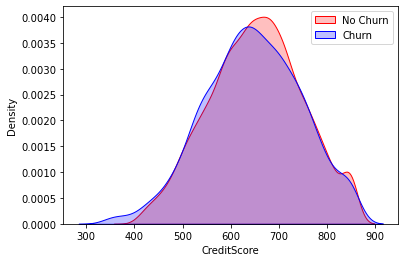

In [152]:
continousDataPlots('CreditScore', df1)

**Following observations are made from these visualizations**

   **1. Customers tend to exit the bank when they get old. In other words, churn is higher for older customers than younger ones.**
    
   **2. In case of Tenure, customers who have stayed longer with the bank are less likely to churn. This insight is not very promising though. Since Tenure is dependent upon Age we can try generating new features to get better insights.**
   
   **3. Churn is higher for customers who have a bigger bank balance. This is worrysome because this trend could effect the lending capabilities of the bank.**
    
   **4. Estimated Salary does not give very clear insights. Customers with higher salary are look more likely to churn but the data is not enough to reach a conclusion.**
    
   **5. Credit Score does not give a clear picture either.**

If you remember, these observations are similar to the ones we made from correlation values. Visualizing the trends only validates what the correlation values told us. Visualizations look more promising and easy to interpret.

## Feature Engineering

**We will try creating new features in this section. Often times, there are some hidden insights in the data which are revealed with these new features.**

**A certain amount of domain knowledge is required for this section. I referred to a few online resources to understand what a credit score is and what is a tenure. I will try and link some of them in this project.**

In [146]:
print(len(df1))

10000


We make a copy of our dataframe at this stage. This is because if new features do not work, we will return to our previous dataframe. It is good practice to copy dataframes before every critical change to the dataset.

In [153]:
df2 = df1.copy()

In [154]:
df2['TenureByAge'] = df2['Tenure']/df2['Age']

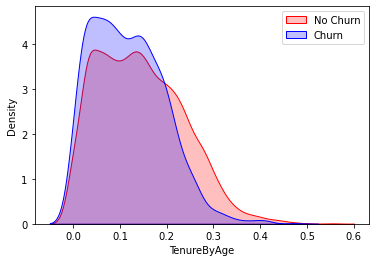

In [155]:
continousDataPlots('TenureByAge', df2)

In [156]:
df2['CreditScoreByAge'] = df2['CreditScore']/df2['Age']

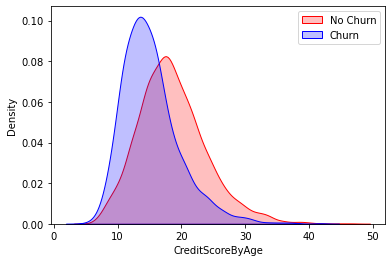

In [157]:
continousDataPlots('CreditScoreByAge', df2)

**This looks good. Let us try and understand these new features.**

**Tenure of a customer is duration of time for which they stay with the bank. This is related with the age of the customer. A customer of Age 28 years will have lower tenure than a customer of Age 38 years if both opened their account at the same age. Therefore, lower tenure does not necessarily mean less loyal customer. TenureByAge is better feature in this regard and gives good insights.**

**Customers with low TenureByAge are more likely to churn. This seems to be feasible and in sync with our general understanding of disloyalty and customer behaviour.**

**Similarly, CreditScoreByAge is a better feature than CreditScore alone. Credit Score is describes the credit merit of an individual who has taken a loan. Credit scores help to depict the credit and repayment history, utilization of credit, tenures of previous debts, and so on. Age plays an important factor here. I will link articles in the project to help you better understand this. For now, this feature is definetely more promising than CreditScore.**
https://www.bankbazaar.com/cic/how-credit-score-is-calculated.html

**Customers with lower CreditScoreByAge are more likely to churn and those with higher CreditScoreByAge.**

In [158]:
corrMatrix2 = df2.corr()

In [159]:
corrMatrix2['Exited'].sort_values(ascending = False)

Exited              1.000000
Age                 0.285323
Balance             0.118533
EstimatedSalary     0.012097
HasCrCard          -0.007138
Tenure             -0.014001
CreditScore        -0.027094
NumOfProducts      -0.047820
TenureByAge        -0.121641
IsActiveMember     -0.156128
CreditScoreByAge   -0.253437
Name: Exited, dtype: float64

<AxesSubplot:>

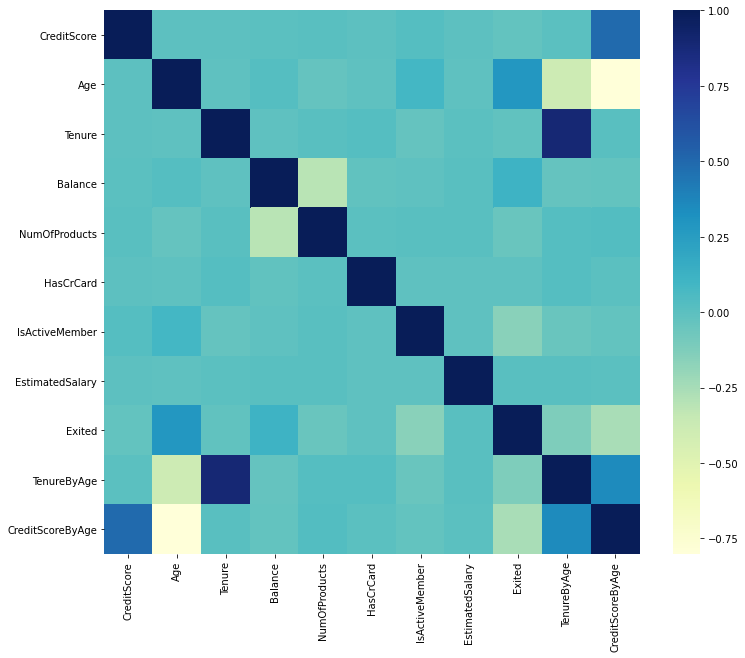

In [160]:
plt.figure(figsize = (12,10))
sns.heatmap(corrMatrix2, cmap="YlGnBu")

**This heatmap of correlation matrix verifies our observations.**

In [161]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,TenureByAge,CreditScoreByAge
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.047619,14.738095
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.024390,14.829268
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.190476,11.952381
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.025641,17.923077
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.046512,19.767442


### Bivariate Analysis

In [162]:
targetChurned = df2.loc[df2['Exited'] == 1]
targetRetained = df2.loc[df2['Exited'] == 0]

In [181]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.figure(figsize = (15, 15))
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

<Figure size 1080x1080 with 0 Axes>

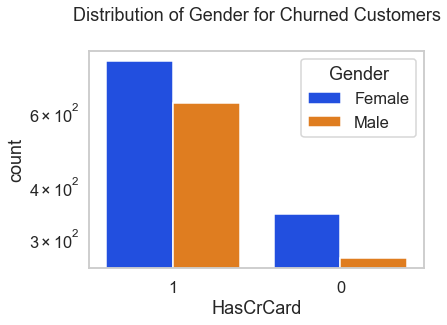

In [182]:
uniplot(targetChurned,col='HasCrCard',title='Distribution of Gender for Churned Customers',hue='Gender')

<Figure size 1080x1080 with 0 Axes>

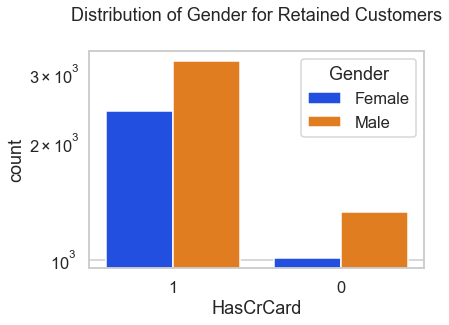

In [183]:
uniplot(targetRetained,col='HasCrCard',title='Distribution of Gender for Retained Customers',hue='Gender')

<Figure size 1080x1080 with 0 Axes>

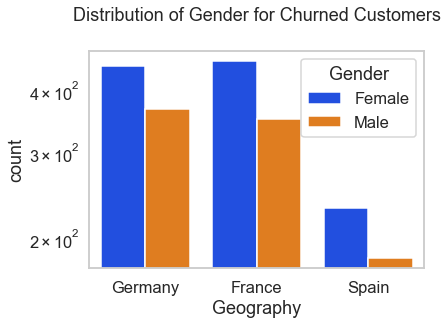

In [184]:
uniplot(targetChurned,col='Geography',title='Distribution of Gender for Churned Customers',hue='Gender')

<Figure size 1080x1080 with 0 Axes>

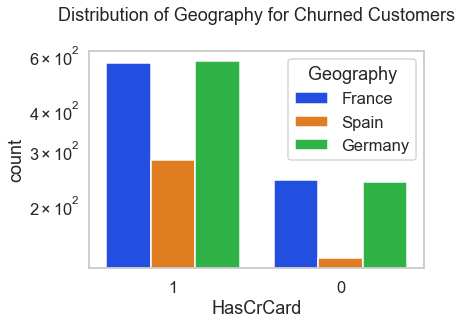

In [194]:
uniplot(targetChurned,col='HasCrCard',title='Distribution of Geography for Churned Customers',hue='Geography')

<Figure size 1080x1080 with 0 Axes>

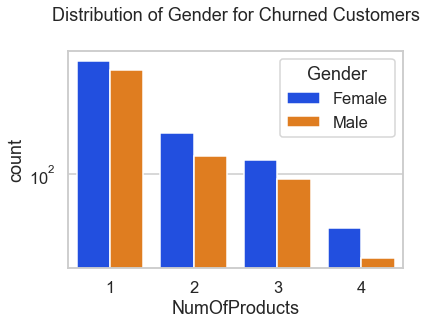

In [191]:
uniplot(targetChurned,col='NumOfProducts',title='Distribution of Gender for Churned Customers',hue='Gender')

## Observations

**1. More Female customers are leaving the bank as compared to male customers.**

**2. Univariate analysis showed that Germany, with least customers, has highest churners. Among those churners, females are greater than males.**

## Conclusion

**Female customers seem to be facing a structural problem in staying loyal to the bank. There could be numerous reasons behind this. There maybe less female staff. Female customers who are dependent on someone else financially (like spouse, guardian) might face difficulty in purchasing products.**

**We need to investigate this issue further. If we figure out the reason of high female customer churn and takes necessary actions, it shall solve the problem of churn to an extent.**

In [196]:
df3 = pd.get_dummies(df2)
df3.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,TenureByAge,CreditScoreByAge,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.047619,14.738095,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,14.829268,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,11.952381,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.025641,17.923077,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,19.767442,0,0,1,1,0


In [199]:
df3.to_csv('PreprocessedData.csv')

In [197]:
from sklearn.model_selection import train_test_split
dfTrain, dfTest = train_test_split(df3, test_size = 0.2, random_state = 42)

In [198]:
dfTrain.to_csv('TrainData.csv')
dfTest.to_csv('TestData.csv')